In [60]:
import glob

file_instru = "Ejemplos/instru635_c01.asc"  #Response data filename 

directory = "../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm"  # Directory where the experimental data is located
query = "P*.asc"    # Query for the experimental data files

file_data = sorted(glob.glob(directory + "/" + query))
print(file_data)

file_head = 9           #Number of header lines in data and response files (defualt for TCSPC=9)
file_result = ""        #Default addon to result filenames (empty)

ups_init = 0.5          #Initial ups
ua_init = 0.005         #Initial ua
t0_init = 0.2         #Initial t0
back_init = 0           #Initial background

sep = 40                #Slab thickness
ro = 0                  #Separation between the source and the optical axis 
gain = 2                #TCSPC temporal gain
n_ref = 1.4             #Refraction index

type_fit = 1            #Fitting type. 1: slab; 2: semi-infinite
t0_fixed = 1            #Fix t0?. 0: No; 1: Yes

cutThr = 0.01          #Threshold (as fraction of the max value) below cutting the data. Values lower than this will be zeroed.

['../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P11.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P12.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P13.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P14.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P15.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P16.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P17.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P18.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P19.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P21.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P22.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P23.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P24.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P25.asc', '../2024-02-16 transiluminancia bolita EPSON+PWT/635 nm/P26.asc', '../2024-

In [61]:
import Fiteo3 as fit

results = fit.FitFunction(file_instru, file_data, file_result, ups_init, ua_init, t0_init, back_init,
            type_fit, t0_fixed, sep, ro, n_ref, file_head, gain, cutThr=cutThr)

Input values: ups = 0.5, ua = 0.005, t0 = 0.2, back = 0, sep = 40, ro = 0, n = 1.4

Fitting P11.asc ...
Cut values: 432...3951
Fitted values: 
ups: 1.0769565517588615, ua: 0.0006382694965412058, baseline correction: 9.823001158353879e-05
Norm:  0.010182142448195576
_____________________
Fitting P12.asc ...
Cut values: 432...3951
Fitted values: 
ups: 1.0782392870662876, ua: 0.000684535889814751, baseline correction: 4.812716426842669e-05
Norm:  0.01001468172560498
_____________________
Fitting P13.asc ...
Cut values: 432...3951
Fitted values: 
ups: 1.0779808575239107, ua: 0.0007247214640017982, baseline correction: 4.79645003821805e-05
Norm:  0.010181148615962551
_____________________
Fitting P14.asc ...
Cut values: 432...3951
Fitted values: 
ups: 1.0771038897338798, ua: 0.000749859887061053, baseline correction: 3.741410613436744e-05
Norm:  0.009931936564266063
_____________________
Fitting P15.asc ...
Cut values: 432...3951
Fitted values: 
ups: 1.0747108391806826, ua: 0.00075180998077

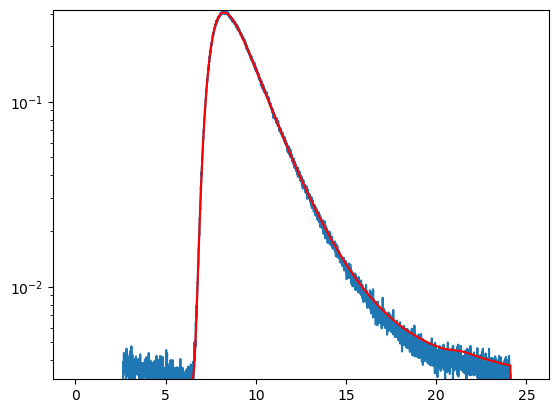

In [62]:
import matplotlib.pyplot as plt
import numpy as np

idTest = 10

fittedFunc = fit.funcion_fiteo_slab(results[idTest][7], results[idTest][1], results[idTest][2], results[idTest][3], results[idTest][4], n_ref, ro, sep, results[idTest][9], results[idTest][7], 0, len(results[idTest][8]))

plt.plot(results[idTest][7], results[idTest][8], label='Exp.') #cmap='viridis'
plt.plot(results[idTest][7], results[idTest][6], label='Fit', c='r')
plt.ylim(np.max(results[idTest][8])*cutThr, np.max(results[idTest][8]))
plt.yscale('log')
#plt.plot(results[1][8], fittedFunc, label='Fitted', c='g')

In [63]:
muas = []
for result in results:
    muas.append(results[result][2])
    
muas = np.array(muas)
print("Average mua: ", np.mean(muas))
muas = np.reshape(muas,(9,9))


mups = []
for result in results:
    mups.append(results[result][1])
    
mups = np.array(mups)
print("Average mups: ", np.mean(mups))
mups = np.reshape(mups,(9,9))

norms = []
for result in results:
    norms.append(results[result][5])
    
norms = np.array(norms)
print("Average norm: ", np.mean(norms))
norms = np.reshape(norms,(9,9))

t0s = []
for result in results:
    t0s.append(results[result][3])
    
t0s = np.array(t0s)
print("Average t0: ", np.mean(t0s))
t0s = np.reshape(t0s,(9,9))

print(np.shape(muas))

Average mua:  0.0007861159328999589
Average mups:  1.0697246830343143
Average norm:  0.011970821221897333
Average t0:  0.19999999999999998
(9, 9)


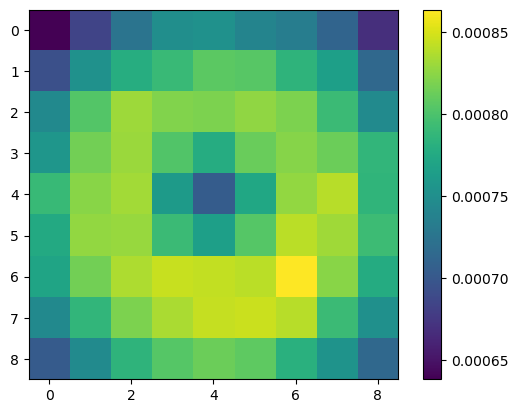

In [64]:
plt.imshow(muas, interpolation='nearest'),
plt.colorbar()
plt.savefig('muas.png')

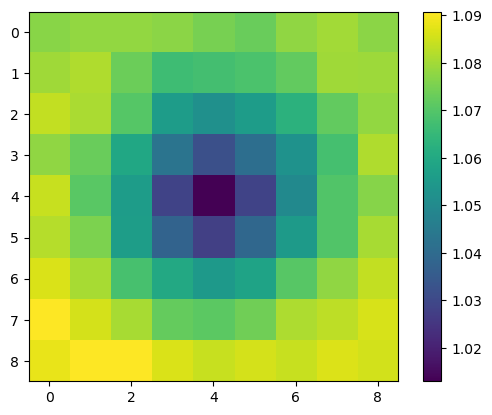

In [65]:
plt.imshow(mups, interpolation='nearest'),
plt.colorbar()
plt.savefig('mups.png')

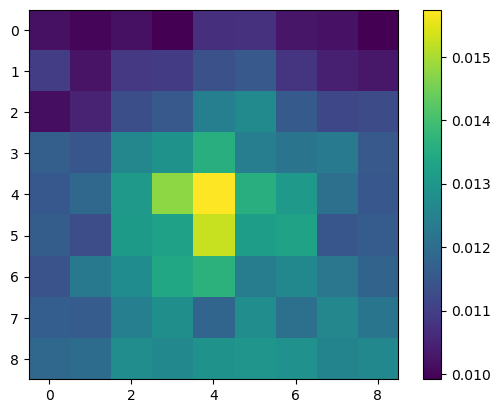

In [66]:
plt.imshow(norms, interpolation='nearest'),
plt.colorbar()
plt.savefig('norms.png')

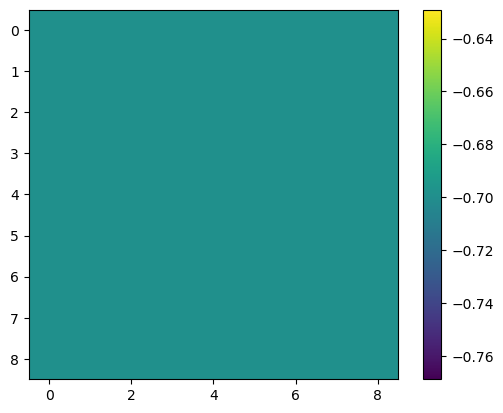

In [67]:
plt.imshow(np.log10(t0s), interpolation='nearest'),
plt.colorbar()
plt.savefig('t0s.png')